### Extract

In [135]:
## O que eu vou extrair?
import requests
import json
import pandas as pd
import numpy as np

sdw2023_api_url = r'https://sdw-2023-prd.up.railway.app/users'

def get_users(url):
    response = requests.get(url)
    return response.json() if response.status_code == 200 else None

# por algum motivo o python está reconhecendo a saída de get_users como dict, devo transfomar em json
users = get_users(sdw2023_api_url)
formated_users = json.dumps(users, indent=2)


### Transform

In [152]:
## Os dados na coluna account estão muito mal formatados. como os valores que me interessam estão apenas nessa coluna eu vou transformar essa coluna de ndarray(array multidimensional) em um dataframe
data = pd.read_json(formated_users)
accounts_names = data['name'].values
accounts = data['account'].values

df_accounts = pd.DataFrame.from_records(accounts)
df_accounts_names = pd.DataFrame(accounts_names)

merged_dataframes = pd.merge(df_accounts_names,df_accounts, left_index=True, right_index=True)
merged_dataframes.rename(columns={0: 'Name'}, inplace=True)
merged_dataframes

,Name,id,number,agency,balance,limit
0,Ayumi,12,00003-03,0001,0.00,1000.0
1,Maria,123,333-5,0001,0.00,500.0
2,Devweekerson,1,01.097954-4,2030,624.12,1000.0
3,anguile,18,00010-4,2003,500.00,1000.0
4,Ronaldo,19,00001-4,0032,0.00,500.0
...,...,...,...,...,...,...
447,Mariah,506,00132-5,0001,0.00,500.0
448,Jack,507,00133-9,0001,0.00,500.0
449,Renatinha,509,45120165-8,1111,0.00,0.0
450,Bonnelle,510,4851620-8,1111,0.00,0.0


### Load

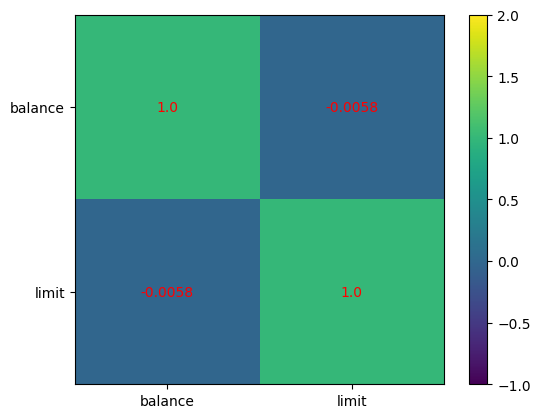

In [176]:
## Observando a correlação entre o saldo na conta e o limite da conta
import matplotlib.pyplot as plt

# definindo os valores que vou correlacionar

balance = merged_dataframes['balance']
limit = merged_dataframes['limit']

# correlacionando saldo e limite

corr_matrix = np.corrcoef(balance, limit)
corr_matrix = corr_matrix.round(decimals=4)

## criando um mapa de calor para visualizar melhor os dados

fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)

## definindo os limites da imagem
im.set_clim(-1, 2)

ax.grid(False)

ax.xaxis.set(ticks=(0, 1), ticklabels=("balance", "limit"))
ax.yaxis.set(ticks=(0, 1), ticklabels=("balance", "limit"))

ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax)
plt.show()

## pelo que foi verificado, não existe nenhuma correlação entre limite e saldo na conta